In [1]:
# Functional API Keras
# https://www.tensorflow.org/guide/keras/functional

In [2]:
import numpy as np

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

tf.keras.backend.clear_session()  # For easy reset of notebook state.

In [5]:
inputs = keras.Input(shape=(784,))
inputs

<tf.Tensor 'input_3:0' shape=(None, 784) dtype=float32>

In [10]:
dense = layers.Dense(64, activation='relu')
x = dense(inputs)

<tf.Tensor 'dense_4/Identity:0' shape=(None, 64) dtype=float32>

In [8]:
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10)(x)

In [11]:
model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

In [12]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


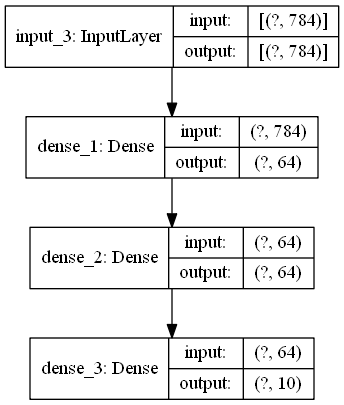

In [14]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

In [26]:
# Load data set or set up dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
display(x_train[0])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [27]:
# preprocess the training data
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

In [30]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=5,
                    validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 65us/sample - loss: 0.0717 - accuracy: 0.9790 - val_loss: 0.1105 - val_accuracy: 0.9696
Epoch 2/5
48000/48000 [==============================] - 2s 44us/sample - loss: 0.0617 - accuracy: 0.9807 - val_loss: 0.1117 - val_accuracy: 0.9697
Epoch 3/5
48000/48000 [==============================] - 2s 43us/sample - loss: 0.0529 - accuracy: 0.9841 - val_loss: 0.1129 - val_accuracy: 0.9703
Epoch 4/5
48000/48000 [==============================] - 2s 48us/sample - loss: 0.0475 - accuracy: 0.9855 - val_loss: 0.1120 - val_accuracy: 0.9712
Epoch 5/5
48000/48000 [==============================] - 2s 47us/sample - loss: 0.0418 - accuracy: 0.9877 - val_loss: 0.1088 - val_accuracy: 0.9725
10000/1 - 0s - loss: 0.0479 - accuracy: 0.9738
Test loss: 0.0950893990731216
Test accuracy: 0.9738
